In [10]:
import pandas as pd
import numpy as np

# Graph
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import random

In [11]:
random.seed(321)

# Random Number Generation

In [12]:
def generate_random_numbers(n):
    random_numbers = [random.randint(1, 5) for _ in range(n)]
    return random_numbers

In [13]:
num_of_numbers = 1  # Change this to the desired number of random numbers
random_numbers = generate_random_numbers(num_of_numbers)
print(random_numbers)

[3]


# Senario
You are a 40-year-old divorcee. You own a successful business and have recently received an 8 Million Dollars buyout offer from a competitor that you want to accept. Your remaining assets are stocks of companies that are your suppliers valued today at 1.2 Million Dollars and cash in several accounts totaling 62,000.

## Assumptions
- Assume income over 492,301 
- Net proceeds from sale 5,455,640

https://www.1031gateway.com/capital-gains-tax-calculator/

In [123]:
df = pd.read_csv('./data/portfolio_w3.csv',
                dtype = {'Value':int}
                )
df

,ID,Ticker,BondName,Morningstar Category,Class,Sub Class,Price,Shares,Value
0,1,IVV,iShares Core S&P 500 ETF,Large Blend,Economically Sensitive Exposures,U.S. Equities,447.05,280,125000
1,3,SCHD,Schwab US Dividend Equity ETF™,Large Value,Economically Sensitive Exposures,U.S. Equities,73.63,"1,358",100000
2,4,USXF,iShares® ESG Advanced MSCI USA ETF,Large Growth,Economically Sensitive Exposures,U.S. Equities,35.99,"2,779",100000
3,7,FOVL,iShares Focused Value Factor ETF,Mid-Cap Value,Economically Sensitive Exposures,U.S. Equities,52.18,"1,916",100000
4,9,VBR,Vanguard Small-Cap Value ETF,Small Value,Economically Sensitive Exposures,U.S. Equities,164.51,304,50000
5,10,VIGI,Vanguard Intl Div Apprec ETF,Foreign Large Growth,Economically Sensitive Exposures,International Equities,74.41,"2,688",200000
6,11,JPEM,JPMorgan Diversified Return EMkts Eq ETF,Diversified Emerging Mkts,Economically Sensitive Exposures,Emerging Market Equities,51.62,"6,587",340000
7,12,ISCF,iShares MSCI Intl Small-Cap Mltfct ETF,Foreign Small/Mid Blend,Economically Sensitive Exposures,International Equities,30.47,"5,579",170000
8,13,IGRO,iShares International Dividend Gr ETF,Foreign Large Blend,Economically Sensitive Exposures,International Equities,62.17,"4,825",300000
9,14,VNQ,Vanguard Real Estate ETF,Vanguard Real Estate Index,Economically Sensitive Exposures,Publicly Traded REITs,81.81,"4,523",370000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    25 non-null     float64
 1   Ticker                25 non-null     object 
 2   BondName              26 non-null     object 
 3   Morningstar Category  21 non-null     object 
 4   Taxonomy              26 non-null     object 
 5   Price                 25 non-null     float64
 6   Shares                25 non-null     object 
 7   Value                 26 non-null     int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 1.8+ KB


In [117]:
sum(df['Value'])

6717500

In [153]:
sum_df = df.groupby(['Class','Sub Class'])['Value'].sum()
sum_df = pd.DataFrame(sum_df)
sum_df

Value
Class                             Sub Class                                  
Cash                              Cash                                 342500
Economically Sensitive Exposures  Emerging Market Equities             340000
                                  International Equities               670000
                                  Long/Short Equities                  335000
                                  Private Equity                       335000
                                  Publicly Traded REITs                670000
                                  Supplier Equity                     1200000
                                  U.S. Equities                        475000
Interest Rate Sensitive Exposures U.S. Government Bonds               1350000
                                  Very-High-Quality Corporate Bonds    500000
                                  Very-High-Quality Municipal Bonds    500000

In [155]:
sum_df.reset_index(inplace=True)
sum_df

,Class,Sub Class,Value
0,Cash,Cash,342500
1,Economically Sensitive Exposures,Emerging Market Equities,340000
2,Economically Sensitive Exposures,International Equities,670000
3,Economically Sensitive Exposures,Long/Short Equities,335000
4,Economically Sensitive Exposures,Private Equity,335000
5,Economically Sensitive Exposures,Publicly Traded REITs,670000
6,Economically Sensitive Exposures,Supplier Equity,1200000
7,Economically Sensitive Exposures,U.S. Equities,475000
8,Interest Rate Sensitive Exposures,U.S. Government Bonds,1350000
9,Interest Rate Sensitive Exposures,Very-High-Quality Corporate Bonds,500000


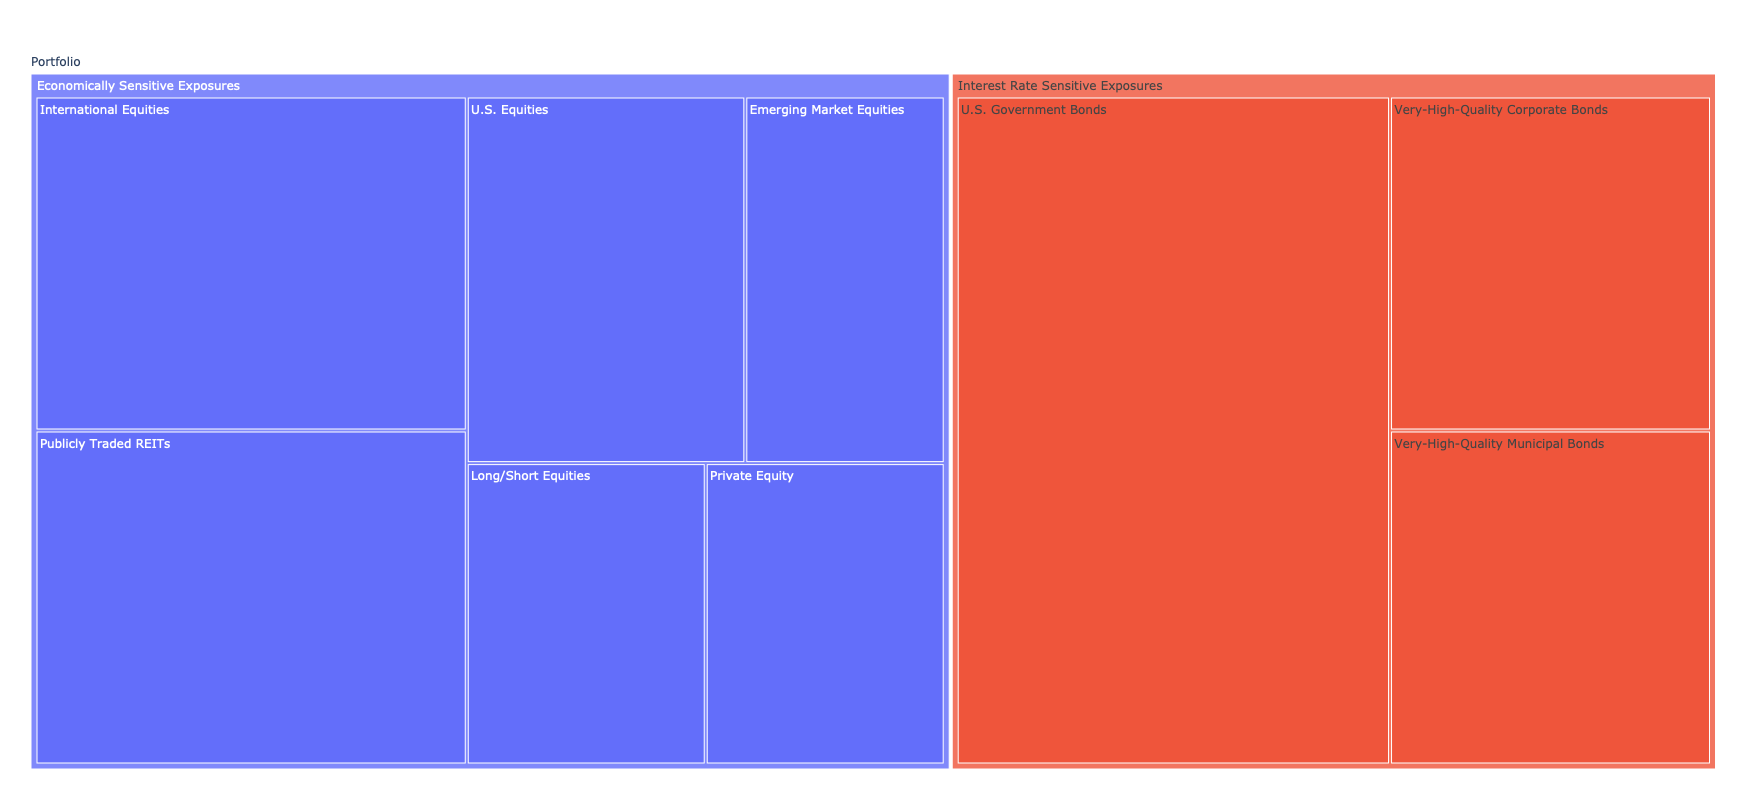

In [75]:
fig = px.treemap(df, path=[px.Constant('Portfolio'),'Class','Sub Class'], values='Value')
fig.update_layout( width = 1400, height = 800,margin = dict(t=50, l=25, r=25, b=25))
fig.show()

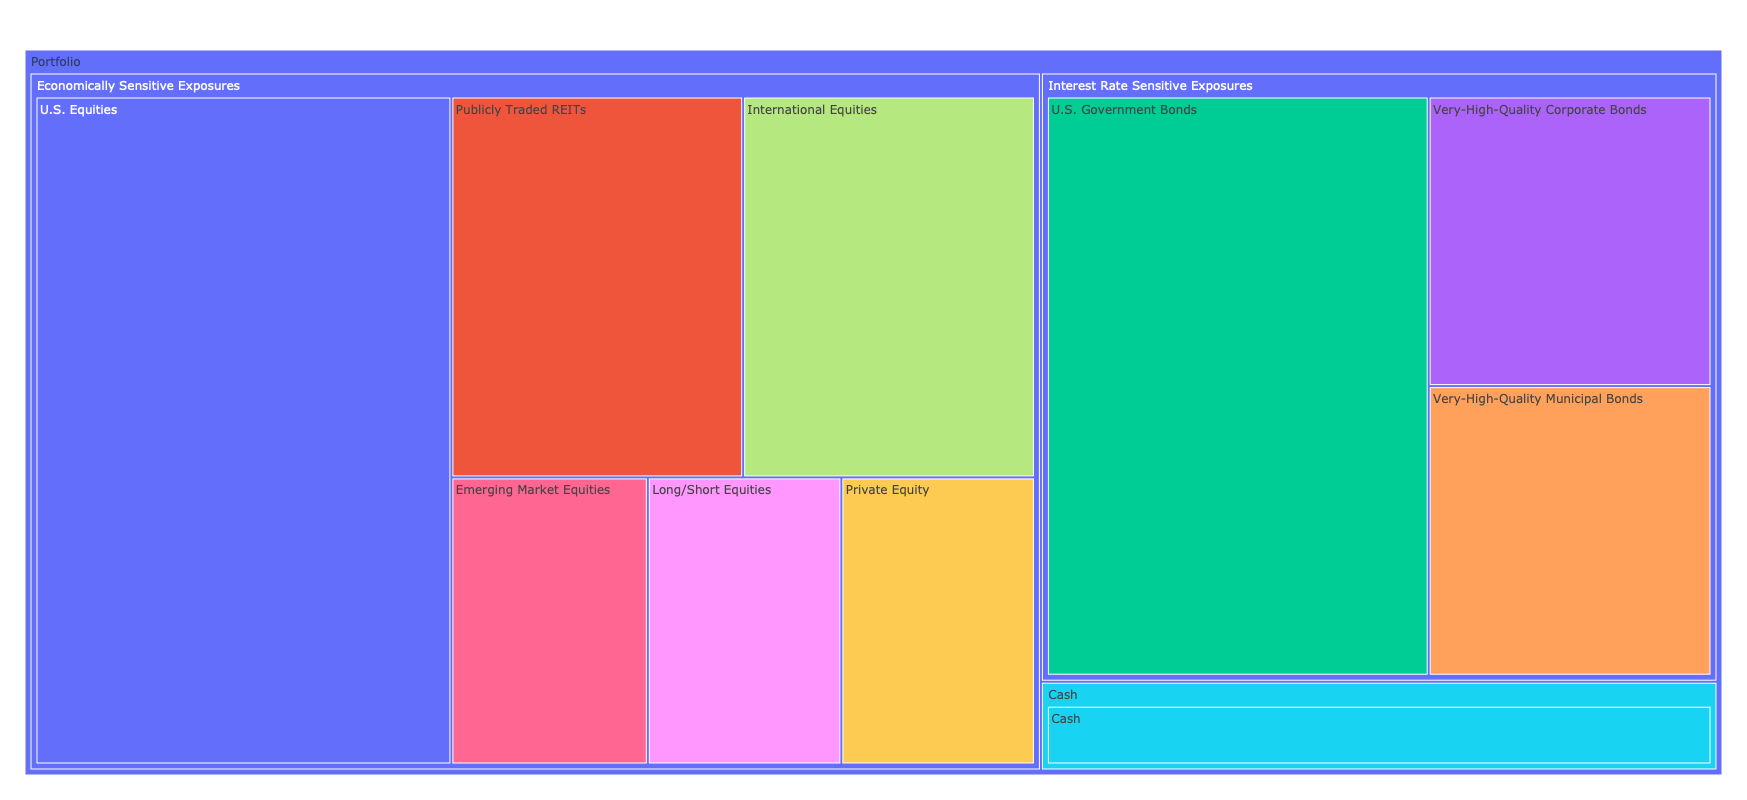

In [95]:
fig = px.treemap(df, path=[px.Constant('Portfolio'),'Class','Sub Class'], values='Value',
                  color='Sub Class', hover_data=['Value'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['Value'], weights=df['Value'])
                )
fig.update_traces(root_color="lightgrey")
fig.update_layout( width = 1400, height = 800,margin = dict(t=50, l=25, r=25, b=25))
fig.show()

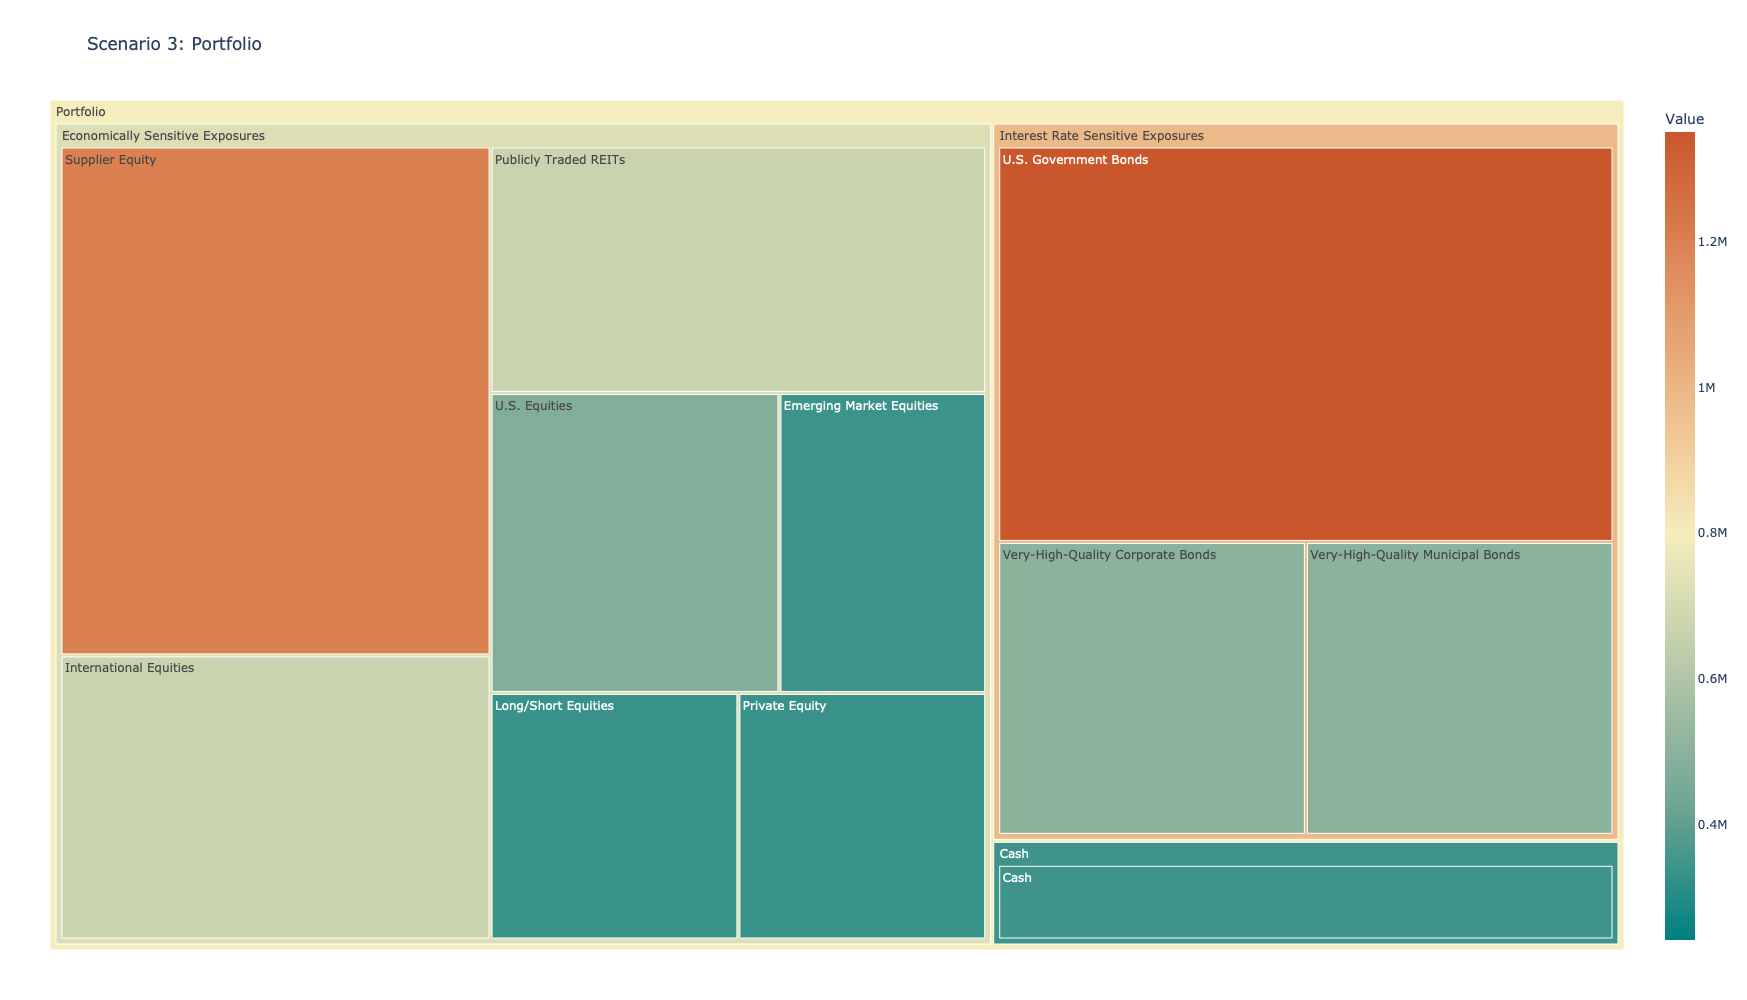

In [158]:
fig = px.treemap(sum_df, path=[px.Constant('Portfolio'),'Class','Sub Class'], values='Value',
                  color='Value', hover_data=['Sub Class'],
                  color_continuous_scale='geyser',
                  color_continuous_midpoint=np.average(sum_df['Value'], weights=sum_df['Value']))

fig.update_layout( width = 1000, height = 1000,margin = dict(t=100, l=50, r=50, b=50))
fig.update_layout(
    title_text='Scenario 3: Portfolio'
)
fig.show()

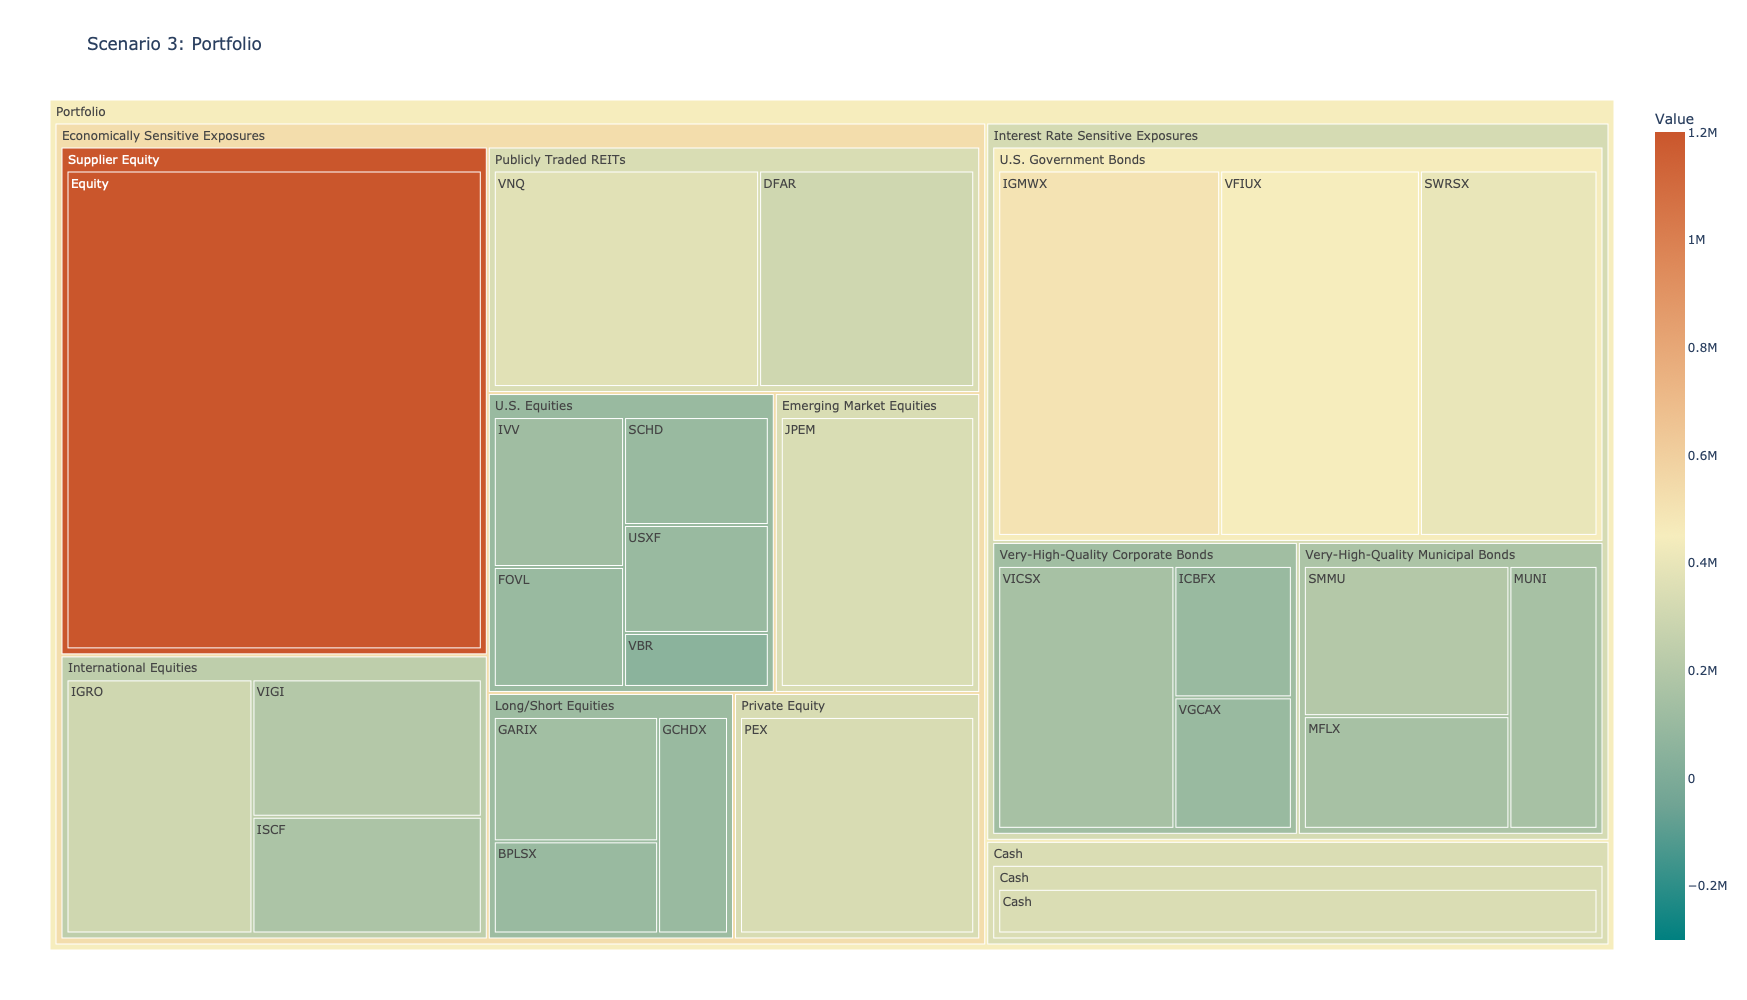

In [159]:
fig = px.treemap(df, path=[px.Constant('Portfolio'),'Class','Sub Class','Ticker'], values='Value',
                  color='Value', hover_data=['Sub Class'],
                  color_continuous_scale='geyser',
                  color_continuous_midpoint=np.average(df['Value'], weights=df['Value']))

fig.update_layout( width = 1000, height = 1000,margin = dict(t=100, l=50, r=50, b=50))
fig.update_layout(
    title_text='Scenario 3: Portfolio'
)
fig.show()

In [102]:
import plotly.express as px
from textwrap import wrap

named_colorscales = px.colors.named_colorscales()
print("\n".join(wrap("".join('{:<12}'.format(c) for c in named_colorscales), 96)))

aggrnyl     agsunset    blackbody   bluered     blues       blugrn      bluyl       brwnyl
bugn        bupu        burg        burgyl      cividis     darkmint    electric    emrld
gnbu        greens      greys       hot         inferno     jet         magenta     magma
mint        orrd        oranges     oryel       peach       pinkyl      plasma      plotly3
pubu        pubugn      purd        purp        purples     purpor      rainbow     rdbu
rdpu        redor       reds        sunset      sunsetdark  teal        tealgrn     turbo
viridis     ylgn        ylgnbu      ylorbr      ylorrd      algae       amp         deep
dense       gray        haline      ice         matter      solar       speed       tempo
thermal     turbid      armyrose    brbg        earth       fall        geyser      prgn
piyg        picnic      portland    puor        rdgy        rdylbu      rdylgn      spectral
tealrose    temps       tropic      balance     curl        delta       oxy         edge
hsv     

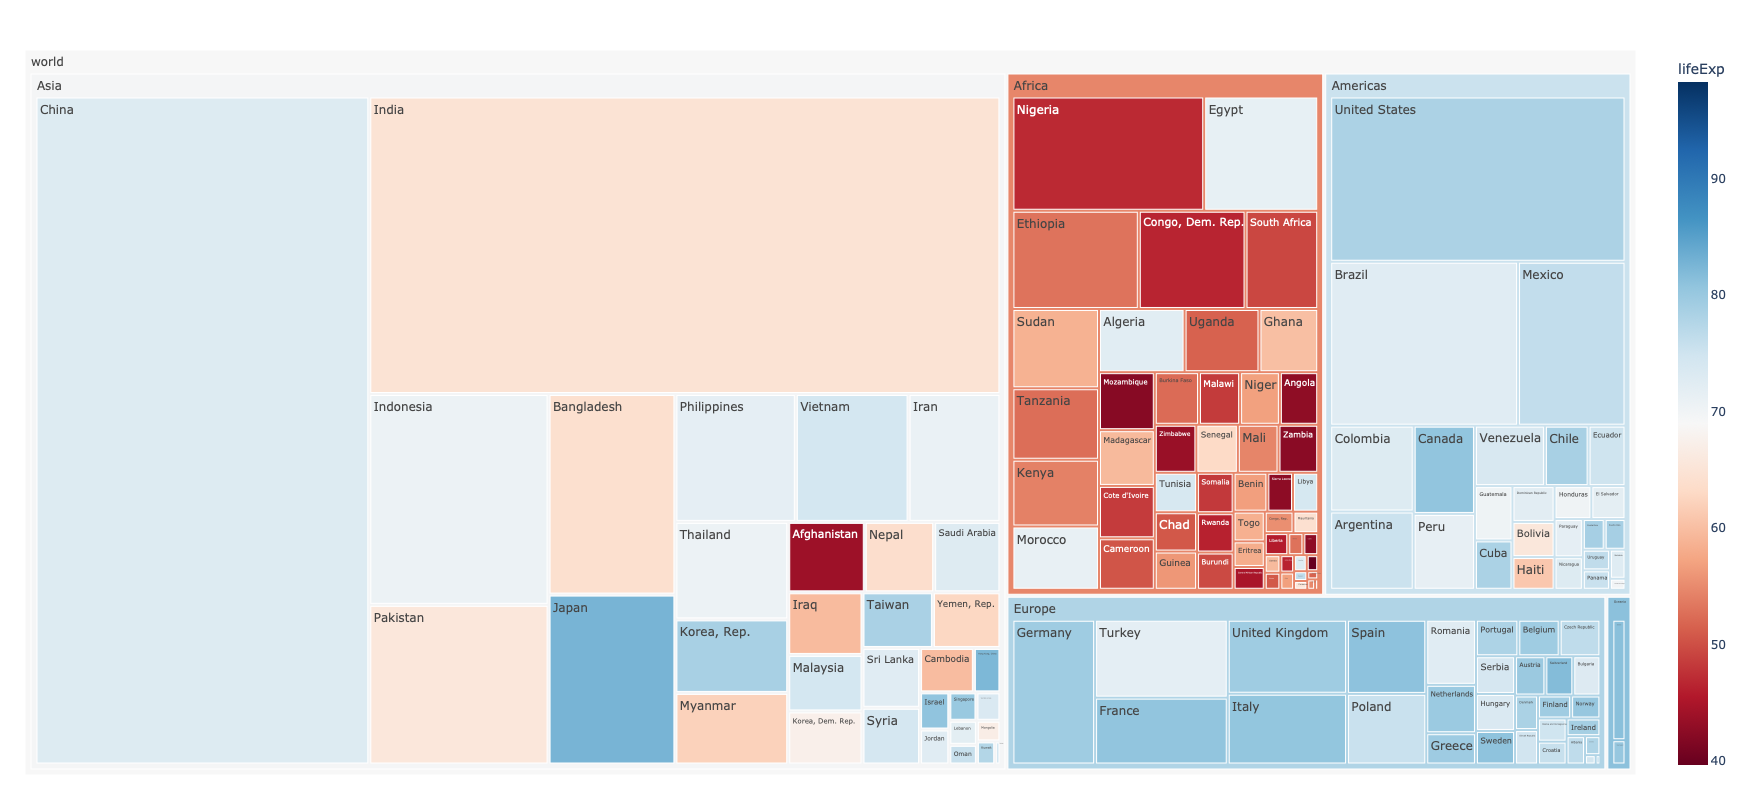

In [97]:
df = px.data.gapminder().query("year == 2007")
fig = px.treemap(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
#fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_layout( width = 1400, height = 800,margin = dict(t=50, l=25, r=25, b=25))
fig.show()